In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'bird_small.mat',
 'bird_small.png',
 'Digit Recognition.ipynb',
 'ex7data1.mat',
 'ex7data2.mat',
 'ex7faces.mat',
 'K-means & PCA.ipynb']

In [3]:
data = loadmat('ex7data2.mat')

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [6]:
X = data['X']

In [7]:
X.shape

(300, 2)

In [8]:
X[:10]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405],
       [1.24792268, 4.93267846],
       [1.97619886, 4.43489674],
       [2.23454135, 5.05547168],
       [2.98340757, 4.84046406],
       [2.97970391, 4.80671081]])

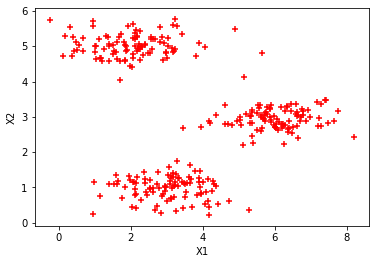

In [9]:
def plotkmeans(X):
    plt.scatter(X[:,0],X[:,1],c='r',marker='+')
    plt.xlabel('X1')
    plt.ylabel('X2')
plotkmeans(X)

In [10]:
def findclosestcentroids(X,centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros((m,1))
    
    for i in range(m):
        dis = np.zeros(K)
        
        for j in range(K):
            dis[j] = np.sqrt((X[i][0]-centroids[j][0])**2+(X[i][1]-centroids[j][1])**2)
        
        idx[i] = int(np.argmin(dis))

    
    return idx
    

In [11]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])

#Find the closest centroids for the examples using the initial_centroids

idx = findclosestcentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(idx[0:3])
print('\n(the closest centroids should be 1, 3, 2 respectively)\n')


Closest centroids for the first 3 examples: 

[[0.]
 [2.]
 [1.]]

(the closest centroids should be 1, 3, 2 respectively)



In [12]:
def computecentroids(X,idx,centroids):
    K = centroids.shape[0]
    centroids = np.zeros((K,X.shape[1]))
    nuX = np.c_[idx,X]
    for i in range(len(centroids)):
        centroids[i] = np.mean(X[nuX[:,0]==i],axis=0)
    return centroids
        
        
                        
    
    

In [13]:
centroids  = computecentroids(X,idx,initial_centroids)
print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')



Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




In [14]:
def initcentroids(X,K):
    m,n = X.shape
    centroids = np.zeros((K,n))
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m)]
    return centroids
    

In [15]:
def plotkmeans(X,centroids,idx):
    plt.scatter(X[:,0],X[:,1],c=idx.reshape(-1),marker='.')
    plt.scatter(centroids[:,0],centroids[:,1],c='r',marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [16]:
K = 3
max_iters = 10

In [17]:
def runkmeans(X,max_iters,K):
    centroids = initcentroids(X,K)
    for i in range(max_iters):
        idx = findclosestcentroids(X,centroids)
        centroids = computecentroids(X,idx,centroids)
    return centroids,idx
    

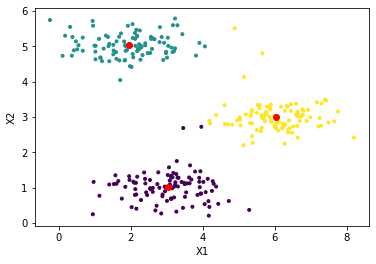

In [18]:
centroids,idx = runkmeans(X,max_iters,K)
plotkmeans(X,centroids,idx)

In [19]:
print(centroids)

[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


# Image compression with K-means

In [20]:
A = plt.imread('bird_small.png')

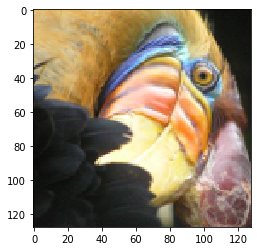

In [21]:
plt.imshow(A)

In [22]:
original_shape = A.shape

In [23]:
X_img = A.reshape((128*128,3))
K = 16
max_iters = 10

In [24]:
centroids,idx = runkmeans(X_img,max_iters,K)

In [25]:
"""idx = findclosestcentroids(X_img,centroids)
X_recovered = centroids[idx,:]
X_recovered = X_recovered.reshape(original_shape)
"""

'idx = findclosestcentroids(X_img,centroids)\nX_recovered = centroids[idx,:]\nX_recovered = X_recovered.reshape(original_shape)\n'

In [28]:
'''''fig ,axes = plt.subplots(2)
axes[0].imshow(A)
axes[1].imshow(X_recovered)'''

"''fig ,axes = plt.subplots(2)\naxes[0].imshow(A)\naxes[1].imshow(X_recovered)"

# Pricipal component Analysis

In [29]:
data2 = loadmat('ex7data1.mat')

In [30]:
type(data2)

dict

In [31]:
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [32]:
X_pca = data2['X']

In [33]:
X_pca.shape

(50, 2)

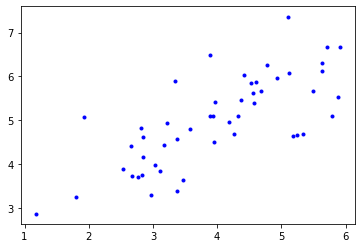

In [34]:
plt.scatter(X_pca[:,0],X_pca[:,1],c='b',marker='.')

In [35]:
def normalize(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    normalize = np.divide(X-mean,std)
    return(normalize,mean,std)

In [36]:
def covariance(X):
    sigma = np.dot(X.T,X)/len(X)
    return sigma

In [37]:
def eigenvecors(sigma,K):
    [U,S,V] = np.linalg.svd(sigma)
    U_reduce = U[:,:K]
    
    return U,S,V,U_reduce

    
    
    

In [38]:
def Z_vector(U_reduce,X): 
    Z_vector = np.zeros((len(X),1))
    #50x1   50x2  2x1
    return np.dot(X,U_reduce)

In [39]:
def recoverdata(U_reduce,Z_vector):
    #50x2 = 50x1 2x2
    x_approx = np.zeros((len(Z_vector),len(U_reduce)))
    x_approx =  np.dot(Z_vector,U_reduce.T)
    return x_approx

In [40]:
def plotvectors(X,U_reduce):
    
    plt.scatter(X[:,0],X[:,1],c='b',marker='.')
    #plt.plot()
    #plt.plot()

In [41]:
X_norm,mean,std = normalize(X_pca)

In [42]:
sigma = covariance(X_norm)

In [43]:
print(sigma)

[[1.         0.73553038]
 [0.73553038 1.        ]]


In [44]:
K=1
U,S,V,U_reduce = eigenvecors(sigma,K)

In [45]:
print(U)


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [46]:
Z_vect = Z_vector(U_reduce,X_norm)
X_approx = recoverdata(U_reduce,Z_vect)

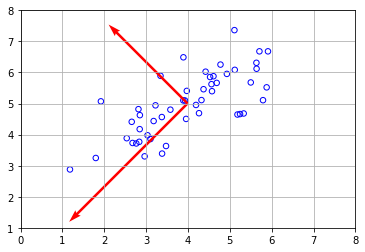

In [47]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=30, edgecolors='b',facecolors='None', linewidth=1);
# setting aspect ratio to 'equal' in order to show orthogonality of principal components in the plot
#plt.gca().set_aspect('equal')
plt.quiver(mean[0],mean[1],U[0,0], U[0,1], scale=2, color='r')
plt.quiver(mean[0],mean[1],U[1,0], U[1,1], scale=3, color='r')
plt.xlim(0,8)
plt.ylim(1,8)
plt.grid()


# PCA on Face Data

In [48]:
os.listdir()

['.ipynb_checkpoints',
 'bird_small.mat',
 'bird_small.png',
 'Digit Recognition.ipynb',
 'ex7data1.mat',
 'ex7data2.mat',
 'ex7faces.mat',
 'K-means & PCA.ipynb']

In [49]:
data3 = loadmat('ex7faces.mat')

In [50]:
type(data3)

dict

In [51]:
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [52]:
X_faces = data3['X']

In [53]:
X_faces.shape

(5000, 1024)

# Vizualizing the data

In [54]:
def plot_faces(X):
    num_img = len(X)
    img_count=0
    row,col = int(np.sqrt(num_img)),int(np.sqrt(num_img))
    fig,axes = plt.subplots(row,col,sharex=True,sharey=True,figsize=(10,10))
    for i in range(row):
        for j in range(col):
            axes[i][j].imshow(X[img_count,:].reshape((32,32),order='F'),cmap='gray')
            img_count+=1
            axes[i][j].axis('off')
        
    return fig,axes
    

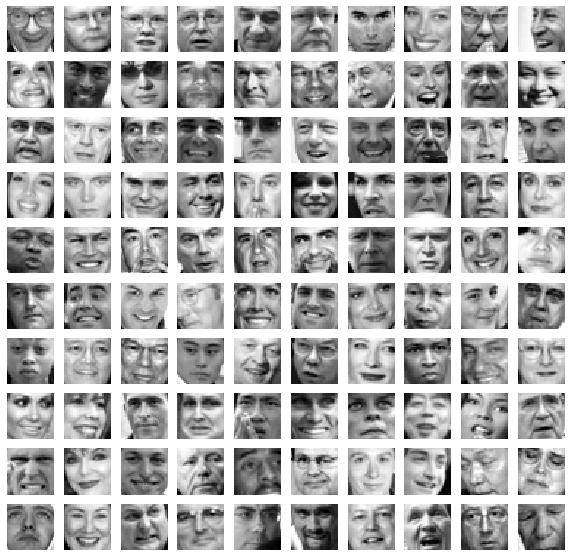

In [55]:
fig,axes = plot_faces(X_faces[:100,:])


In [56]:
X_Norm,mean,sigma = normalize(X_faces)

In [57]:
K = 100
sigma = covariance(X_Norm)
U,S,V,U_reduce = eigenvecors(sigma,K)

In [58]:
Z = Z_vector(U_reduce,X_Norm)
X_approx = recoverdata(U_reduce,Z)
X_approx.shape

(5000, 1024)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


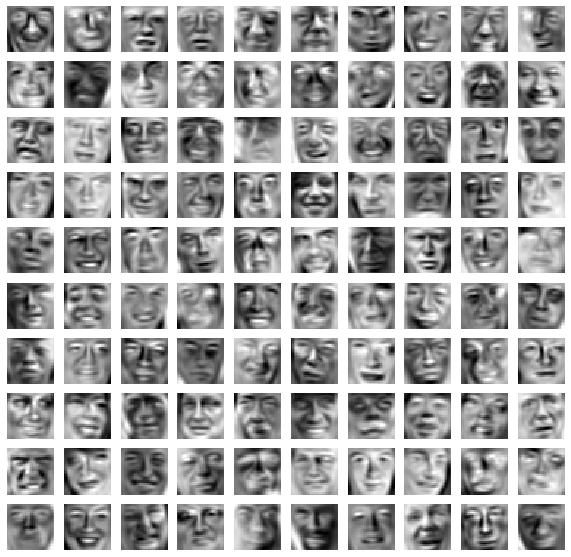

In [65]:
fig,axes = plot_faces(X_approx[:100,:])
fig.show()

In [ ]:

f,ax2 = plot_faces(X_approx[:25,:])
